In [ ]:
!pip install -q diffusers transformers accelerate invisible-watermark>=0.2.0

In [ ]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

### U-Net Architecture:
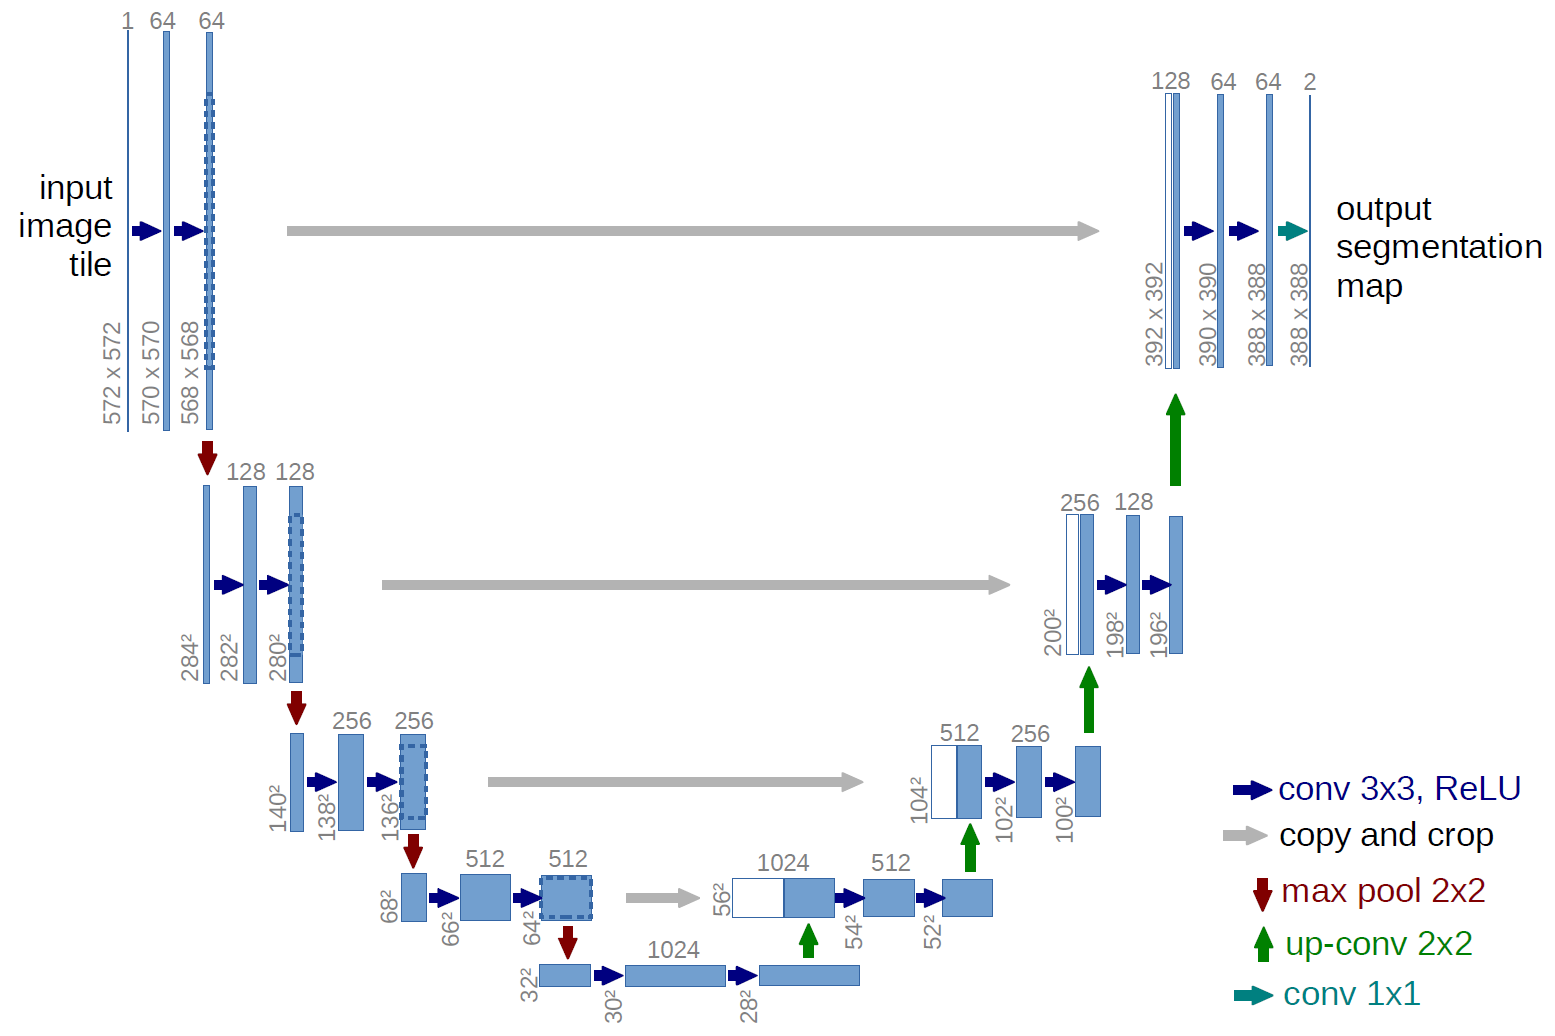

In [ ]:
class StableDiffusionXl:
  def __init__(self):
    torch.cuda.empty_cache()
    self.pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
        "stabilityai/stable-diffusion-xl-base-1.0",
        torch_dtype=torch.float16,
        variant="fp16",
        use_safetensors=True
        ).to("cuda")
    self.pipeline_image2image = AutoPipelineForImage2Image.from_pipe(
        self.pipeline_text2image).to("cuda")

  def text2image(self, prompt):
    image = self.pipeline_text2image(prompt=prompt).images[0]
    return image

  def image2imageUrl(self, init_image, prompt, strength=0.8, guidance_scale=10.5):
    image = self.pipeline_image2image(prompt,
                                      image=init_image,
                                      strength=strength,
                                      guidance_scale=guidance_scale).images[0]
    return make_image_grid([init_image, image], rows=1, cols=2)

In [ ]:
stableDiffusionXl = StableDiffusionXl()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt = input("Enter prompt: ")

Enter prompt: DJ Gandhi


In [ ]:
image = stableDiffusionXl.text2image(prompt)
image

In [ ]:
modify_image = input("Modify image based on your prompt: ")

Modify image based on your prompt: make him Gen Z


In [ ]:
images = stableDiffusionXl.image2imageUrl(image, modify_image)
images